# bert 컬럼 추가

## lstm

### 라이브러리

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
# plt.style.use("fivethirtyeight")
# %matplotlib inline

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import datetime
from sklearn.metrics import mean_squared_error

### 데이터 로드


*   pwd: 현재 경로 표시하기
*   cd drive/MyDrive/bigdata_project/data: 왼쪽 폴더 아이콘 누른 뒤 3번째 아이콘 눌러서 구글 드라이브를 마운트하고 다운 받은 엑셀파일이 저장된 경로를 찾아 들어가야함





In [17]:
/pwd

'/content/drive/MyDrive/bigdata_project/data'

In [18]:
cd drive/MyDrive/bigdata_project/data

[Errno 2] No such file or directory: 'drive/MyDrive/bigdata_project/data'
/content/drive/MyDrive/bigdata_project/data


In [19]:
ls

datareader_finbert_to_num_v2.xlsx
datareader_finbert_to_num.xlsx
datareader_finbert.xlsx
hyundai_stock_dataset_finBERT_notnull.xlsx
naver_finance_news.xlsx
naver_news.xlsx
preprocessed_dup_eliminated_dataset_finBERT.xlsx
report.xlsx
samsung_stock_dataset_finBERT_notnull_select_column.xlsx
samsung_stock_dataset_finBERT_notnull.xlsx
stock_dataset_finBERT_notnull.xlsx


In [35]:
# 로우 데이터로 엑셀파일 로드
# 실행 전에 미리 구글 드라이브 마운트를 해야하고 동일 경로에서 엑셀파일을 읽어들여야 함
# raw_data = pd.read_excel('samsung_stock_dataset_finBERT_notnull.xlsx') # 삼성
raw_data = pd.read_excel('hyundai_stock_dataset_finBERT_notnull.xlsx') # 현대

raw_data = raw_data.set_index("Date")
raw_data = raw_data.drop(['PSAR-up','PSAR-down'],axis=1)
print(raw_data.shape)
raw_data = raw_data.dropna(axis=0) # 널값 있는 행 제거
raw_data

(1234, 36)


,Open,High,Low,Close,Volume,Change,Rn,MRn,Volatility10,Volatility30,...,PSAR,RSI,ADX,OBV,OSCILLATOR,negative,neutral,positive,sentiment,Next_day
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-22,98000,98000,92500,92800,1527106,-0.051125,0.948875,0.970848,0.064405,0.128248,...,108227.542910,23.632361,46.177978,-7318434,-10220.000000,0.999829,0.000101,0.000070,-1,93700
2018-11-23,92800,94000,92600,93700,558490,0.009698,1.009698,0.987217,0.067582,0.129319,...,106340.237761,26.200770,46.938104,-6759944,-11292.352941,0.092811,0.081122,0.826067,1,95100
2018-11-26,93600,95800,93500,95100,663188,0.014941,1.014941,0.991172,0.068941,0.130590,...,104679.409229,30.136930,46.795555,-6096756,-11985.882353,0.232355,0.765629,0.002016,0,101000
2018-11-27,95900,101500,95800,101000,1436195,0.062040,1.062040,1.028893,0.093919,0.142687,...,103217.880122,43.752423,44.538024,-4660561,-11401.176471,0.995160,0.000377,0.004462,-1,101000
2018-11-28,100500,101500,99800,101000,602728,0.000000,1.000000,1.025660,0.093510,0.141061,...,101931.734507,43.752423,42.441745,-4057833,-10123.529412,0.000464,0.999429,0.000107,0,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,189000,189000,186500,187500,387758,-0.010554,0.989446,1.003631,0.041840,0.073688,...,178906.324230,55.685680,8.537447,155750793,2866.176471,0.003125,0.000992,0.995883,1,187000
2022-06-03,188500,189000,185000,187000,400003,-0.002667,0.997333,0.999149,0.036509,0.073090,...,179118.197745,54.660158,8.174648,155350790,3138.235294,0.000029,0.000102,0.999869,1,183500
2022-06-07,186000,186500,183000,183500,621262,-0.018717,0.981283,0.989354,0.033771,0.075594,...,179325.833790,47.996752,7.970238,154729528,2752.941176,0.153971,0.844375,0.001654,0,183000


### X, y 설정

              Open    High     Low   Close   Volume    Change        Rn  \
Date                                                                      
2018-11-22   98000   98000   92500   92800  1527106 -0.051125  0.948875   
2018-11-23   92800   94000   92600   93700   558490  0.009698  1.009698   
2018-11-26   93600   95800   93500   95100   663188  0.014941  1.014941   
2018-11-27   95900  101500   95800  101000  1436195  0.062040  1.062040   
2018-11-28  100500  101500   99800  101000   602728  0.000000  1.000000   
...            ...     ...     ...     ...      ...       ...       ...   
2022-06-02  189000  189000  186500  187500   387758 -0.010554  0.989446   
2022-06-03  188500  189000  185000  187000   400003 -0.002667  0.997333   
2022-06-07  186000  186500  183000  183500   621262 -0.018717  0.981283   
2022-06-08  183500  185000  182000  183000   556940 -0.002725  0.997275   
2022-06-09  183000  183500  180500  182500   656175 -0.002732  0.997268   

                 MRn  Vo

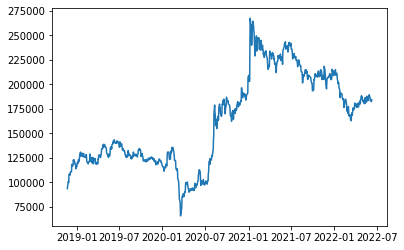

In [36]:
raw_X_A = raw_data.iloc[:, :35] # finbert 결과만 추가했음
raw_y = raw_data.iloc[:, 35:36] # 다음날 종가 데이터가 들어있음

print(raw_X_A)
print(raw_y)

plt.plot(raw_y, label = 'samsung')
plt.show()

### 전처리

In [37]:
# X, y 데이터를 0~1 사이 값으로 정규화 
# 학습이 잘되기 위해 하는 것이고, 이 값은 추후 inverse로 도로 되돌림
sc = MinMaxScaler()
sc_X = sc.fit_transform(raw_X_A)
sc_y = sc.fit_transform(raw_y)

train_size = int(len(sc_y) * 0.67)
test_size = len(sc_y) - train_size

# 텐서화? 하기
dataX = Variable(torch.Tensor(np.array(sc_X)))
dataY = Variable(torch.Tensor(np.array(sc_y)))

# train 데이터 2/3으로 자르기
trainX = Variable(torch.Tensor(np.array(sc_X[0:train_size])))
trainY = Variable(torch.Tensor(np.array(sc_y[0:train_size])))

# test 데이터 나머지 1/3으로 자르기
testX = Variable(torch.Tensor(np.array(sc_X[train_size:len(sc_X)])))
testY = Variable(torch.Tensor(np.array(sc_y[train_size:len(sc_y)])))

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

# lstm 모델에 적용할 때 shape을 변경해줘야 함 
# reshape(a, (b,1,c)) 형태로 모델에 돌리기 위해 2차원으로 바꿔주는 것임

trainX_fin = torch.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX_fin = torch.reshape(testX, (testX.shape[0], 1, testX.shape[1])) 

dataX_fin = torch.reshape(dataX, (dataX.shape[0], 1, dataX.shape[1]))
print("Training Shape", trainX_fin.shape, trainY.shape)
print("Testing Shape", testX_fin.shape, testY.shape) 
print(dataX_fin.shape, dataY.shape)

torch.Size([585, 35])
torch.Size([289, 35])
torch.Size([585, 1])
torch.Size([289, 1])
Training Shape torch.Size([585, 1, 35]) torch.Size([585, 1])
Testing Shape torch.Size([289, 1, 35]) torch.Size([289, 1])
torch.Size([874, 1, 35]) torch.Size([874, 1])


### 모델 정의

In [38]:
# 모델 정의하기

class LSTM(nn.Module):
    # Long Short Term Memory
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.relu(h_out)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        
        return out


### 학습

In [45]:
num_epochs = 15000
learning_rate = 0.0005

input_size = trainX_fin.shape[2] # 컬럼 개수
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers, trainX_fin.shape[1])

loss_function = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm.forward(trainX_fin)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = loss_function(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.48480
Epoch: 100, loss: 0.02946
Epoch: 200, loss: 0.00906
Epoch: 300, loss: 0.00390
Epoch: 400, loss: 0.00235
Epoch: 500, loss: 0.00153
Epoch: 600, loss: 0.00116
Epoch: 700, loss: 0.00098
Epoch: 800, loss: 0.00086
Epoch: 900, loss: 0.00077
Epoch: 1000, loss: 0.00070
Epoch: 1100, loss: 0.00064
Epoch: 1200, loss: 0.00060
Epoch: 1300, loss: 0.00056
Epoch: 1400, loss: 0.00053
Epoch: 1500, loss: 0.00051
Epoch: 1600, loss: 0.00049
Epoch: 1700, loss: 0.00047
Epoch: 1800, loss: 0.00045
Epoch: 1900, loss: 0.00044
Epoch: 2000, loss: 0.00042
Epoch: 2100, loss: 0.00041
Epoch: 2200, loss: 0.00040
Epoch: 2300, loss: 0.00039
Epoch: 2400, loss: 0.00038
Epoch: 2500, loss: 0.00037
Epoch: 2600, loss: 0.00036
Epoch: 2700, loss: 0.00035
Epoch: 2800, loss: 0.00035
Epoch: 2900, loss: 0.00034
Epoch: 3000, loss: 0.00033
Epoch: 3100, loss: 0.00033
Epoch: 3200, loss: 0.00032
Epoch: 3300, loss: 0.00032
Epoch: 3400, loss: 0.00032
Epoch: 3500, loss: 0.00031
Epoch: 3600, loss: 0.00031
Epoch: 3700, 

### 모델 평가

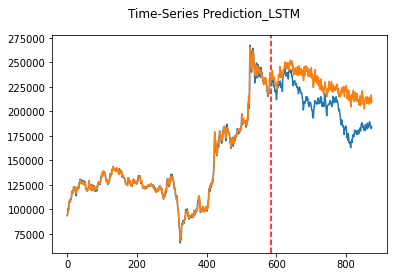

,True,Pred,close,direction,direc_pred
0,93700.0,94203.843750,92800,1,1
1,95100.0,96243.890625,93700,1,1
2,101000.0,96976.140625,95100,1,1
3,101000.0,102203.914062,101000,1,1
4,100000.0,104036.914062,101000,0,1
...,...,...,...,...,...
869,187000.0,212631.578125,187500,0,1
870,183500.0,213339.953125,187000,0,1
871,183000.0,208456.046875,183500,0,1
872,182500.0,216811.421875,183000,0,1


MSE : 211949568.0, RMSE : 14558.48828125, SCORE : 61.6%


In [46]:
# 모델 평가하기
lstm.eval()

# 학습시킨 모델에 전체 데이터를 적용시켜 Y를 추출한 것

# 전체 데이터의 2/3인 train 데이터까지는 모델 학습에서 사용했던 데이터이고
# 1/3인 test 데이터는 모델이 예측한 값
train_predict = lstm(dataX_fin)

# 전체 데이터 예측 값(Y)을 numpy array로 변경
data_predict = train_predict.data.numpy()

# 실제 Y데이터 값을 numpy array로 변경
dataY_plot = dataY.data.numpy()

# 위에서 모델에 적용하려고 0~1 사이로 정규화했던 값을 다시 inverse
data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

# 학습에 사용됐던 데이터와 예측한 값의 경계를 선으로 표현
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction_LSTM')
plt.show()

# 예측값: data_predict
# 실제값: dataY_plot

data_predict_fin = list(data_predict.flatten())
dataY_plot_fin = list(dataY_plot.flatten())

score_table = pd.DataFrame({'True': dataY_plot_fin,
                            'Pred': data_predict_fin})


# -----
score_table['close'] = list(raw_data['Close'])

# i[1][0] # True
# i[1][1] # Pred
# i[1][2] # close
# 1: up
# 0: down
# cnt: up&down 맞춘 갯수
# result: up&down 예측 정확도

direction = []
direc_pred = []
for i in score_table.iterrows():
    if i[1][0] >= i[1][2]:
        direction.append(1)
    else:
        direction.append(0)

for i in score_table.iterrows():
    if i[1][1] >= i[1][2]:
        direc_pred.append(1)
    else:
        direc_pred.append(0)

score_table['direction'] = direction
score_table['direc_pred'] = direc_pred

cnt = 0
for i in score_table.iterrows():
    if i[1][3] == i[1][4]:
        cnt += 1

result = cnt/len(score_table)*100
result = result
# -----

display(score_table)

# validation score
MSE = mean_squared_error(score_table['True'], score_table['Pred'])
RMSE = np.sqrt(MSE)

print(f"MSE : {MSE}, RMSE : {RMSE}, SCORE : {result:.1f}%")